In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os, time, shutil
from PIL import Image
from time import gmtime, strftime
import csv
import cv2
import glob
import serial,sys
import signal
from serial import SerialException

path="C:\\Users\\ЛФКИТ-3\\Documents\\Interferom\\img\\seq\\"
from IPython.display import clear_output
from IPython import display

%matplotlib inline



In [7]:
try:
    serialData = serial.Serial('COM3',115200)
except SerialException as e:
    print(e)
    
    
def gen_int_handler(serial):
    def int_handler(signum, frame):
        print("Got sigterm, closing port")
        serial.close()
        raise  Exception('Interrupt') 
        #cv2.destroyAllWindows()
    return int_handler

def upd_plot(new_seq=[]):
    display.clear_output(wait=True)
    plt.plot(new_seq)
    display.display(plt.show()) 

could not open port 'COM3': PermissionError(13, 'Отказано в доступе.', None, 5)


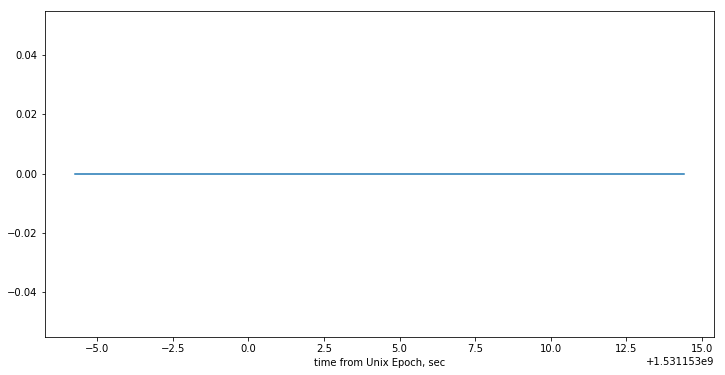

None

got 2 new shots. Intensity: 0.000000, stddev 0.000000
 iter tme: 1.9596867561340332
Got sigterm, closing port


Exception: Interrupt

In [10]:
files = []
intens = []
stddevs=[]
times=[]
#start =time.time()
cam_shot_interval = 0.5
#mean_over_shots = 50
mean_over_time = 2    # seconds
display_time = 20
time_ = 0.0
signal.signal(signal.SIGINT, gen_int_handler(serialData))

count = time.time()//mean_over_time+1
iter_start = time.time()
ins = []
while True:
    num = 0
    iter_start = time.time()
    ins = []
    while True:
        t = time.time()
        if t//mean_over_time<count:
            tries=0
            img, ret = None, False
            line= serialData.readline()
            value = -1
            if line[-2:] != b'\r\n':
                print("Something wrong with data format:",line,"expected 'b\r\n'")
            else:
                value = int(line[:-2])
            mean = value
            print("Read from serial %f"%(mean))
            ins.append(mean)
            time.sleep(cam_shot_interval)
        else:
            count+=1
            print("ending measurm")
            break
    ints = np.mean(ins)
    sdev = np.std(ins)
    if not np.isnan(ints):
        intens.append(ints)
        stddevs.append(sdev)
        times.append(t)

    points_num = int(display_time//mean_over_time+1)
    display_obj = (np.array(intens[-points_num:]),
                   np.array(stddevs[-points_num:]))

    display.clear_output(wait=True)
    f,ax = plt.subplots(figsize=(12,6))
    # plot intensities
    ax.plot(times[-points_num:],display_obj[0])
    # plot standart deviation
    ax.fill_between(times[-points_num:], display_obj[0]+display_obj[1],
                     display_obj[0]-display_obj[1], facecolor='blue', alpha=0.1)
    plt.xlabel('time from Unix Epoch, sec')

    display.display(plt.show())

    print('got %i new shots. Intensity: %f, stddev %f'%
          (len(ins), ints, sdev )) 
    print(' iter tme:',time.time() - iter_start)


In [ ]:
# SAVING TO FILE
save_to="C:\\Users\\ЛФКИТ-3\\Documents\\Interferom\\data\\"+\
        "data_%s_port2.csv"%time.strftime('%d-%m-%Y_%H-%M')

print('total number of points: %i'%len(intens))
result = np.array(intens)
## times = np.arange(0,len(intens),file_check_interval)
data = np.stack((result,times)).T
print(data.shape)
np.savetxt(save_to,data,delimiter=',',fmt='%10.5f')
print ("saved to %s"%save_to)

In [ ]:
time.strftime('-%x-%H:%M')


In [ ]:
for i in counter(0.2):
    print(i)

In [ ]:
today = time.asctime()
#today
087.5959406%1.5
rem = 087.5959406%1.5



In [ ]:
87.5959406//1.5


In [ ]:
1.5*58 + rem
rem
